In [1]:
# Codes for Dr. Cohen's course 

import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time as ttime
import random
from mpl_toolkits.mplot3d import Axes3D

# Complex numbers

In [2]:
#Complex numbers
z1 = 4 + 1j*3
z2 = complex(4,3)    
z3 = complex('4+3j') 
print(z1,z2,z3)

(4+3j) (4+3j) (4+3j)


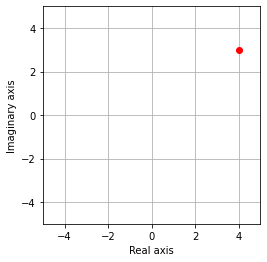

In [3]:
#Plot complex number
plt.plot(np.real(z1),np.imag(z1),'ro')
plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

In [4]:
# complex number's magnitude / amplitude(in FT)
mag = np.sqrt( np.real(z1)**2 + np.imag(z1)**2 )
mag = np.abs(z1)
print( 'Magnitude:',mag )

# complex number's angle / phase
phs = math.atan2( np.imag(z1), np.real(z1) )
print( 'Angle:',phs )

Magnitude: 5.0
Angle: 0.6435011087932844


# Euler's formula

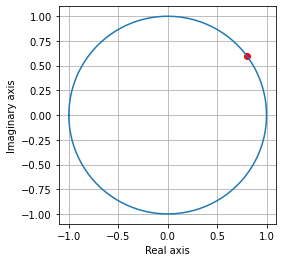

In [5]:
# [cos(k),sin(k)] is on the unit circle for any real k

# define k (any real number)
k = 2/np.pi

# Euler's notation
euler = np.exp(1j*k)

# plot dot
plt.plot(np.cos(k),np.sin(k),'ro')

# draw unit circle for reference
x = np.linspace(-np.pi,np.pi,num=100)
plt.plot(np.cos(x),np.sin(x))

# some plotting touch-ups
plt.axis('square')
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

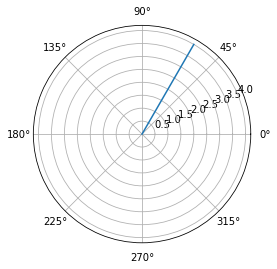

In [6]:
m = 4; # magnitude
k = np.pi/3; # phase
compnum = m*np.exp( 1j*k );

# extract magnitude and angle
mag = np.abs(compnum);
phs = np.angle(compnum);

plt.polar([phs,phs],[0,mag])
plt.show()

# Sine waves and complex sine waves

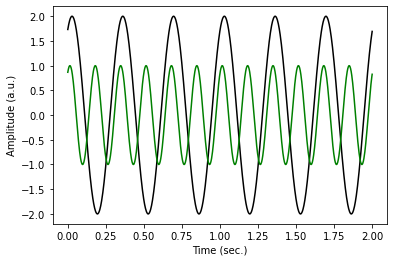

In [7]:
# simulation parameters
srate = 500; # sampling rate in Hz
time  = np.arange(0.,2.,1./srate) # time in seconds

# sine wave parameters
freq = 3;    # frequency in Hz
ampl = 2;    # amplitude in a.u. (arbitrary unit for normalized amplitude)
phas = np.pi/3; # phase in radians

# generate the sine wave
sinewave1 = ampl * np.sin( 2*np.pi * freq * time + phas )
sin = lambda t,k,A,phi: + A*np.sin( 2*np.pi*k*t + phi )
sinewave2 = sin( time, 2*freq, .5*ampl, phas )

plt.plot(time,sinewave1,'k')
plt.plot(time,sinewave2,'g')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

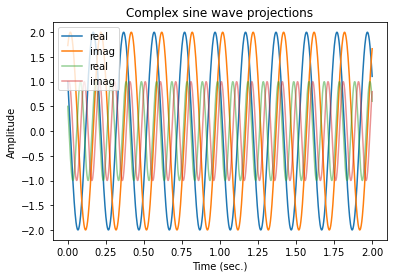

In [8]:
# complex sine waves

# general simulation parameters
srate = 500; # sampling rate in Hz
time  = np.arange(0.,2.,1./srate) # time in seconds

# sine wave parameters
freq = 5;    # frequency in Hz
ampl = 2;    # amplitude in a.u.
phas = np.pi/3; # phase in radians

# generate the sine wave
csw = ampl * np.exp( 1j* (2*np.pi * freq * time + phas) )
csin = lambda t,k,A,phi: A * np.exp( 1j* (2*np.pi * k * t + phi) )
csw2 = csin( time, 2*freq, .5*ampl, phas )

# plot the results
plt.plot(time,np.real(csw),label='real')
plt.plot(time,np.imag(csw),label='imag')
plt.plot(time,np.real(csw2),label='real',alpha=0.5)
plt.plot(time,np.imag(csw2),label='imag',alpha=0.5)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude')
plt.title('Complex sine wave projections')
plt.legend()
plt.show()


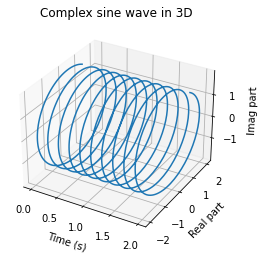

In [9]:
# %matplotlib qt

# now show in 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(time,np.real(csw),np.imag(csw))
ax.set_xlabel('Time (s)'), ax.set_ylabel('Real part'), ax.set_zlabel('Imag part')
ax.set_title('Complex sine wave in 3D')
plt.show()

# Dot product

In [10]:
%matplotlib inline

# two vectors
v1 = [ 1, 2, 3 ];
v2 = [ 3, 2, 1 ];

# compute the dot product
dp = sum( np.multiply(v1,v2) )

print('Dot product:',dp)

Dot product: 10


In [11]:
# dot products of sine waves

# general simulation parameters
srate = 500; # sampling rate in Hz
time  = np.arange(0.,2.,1./srate) # time in seconds

# sine wave parameters
freq1 = 5;    # frequency in Hz
freq2 = 5;    # frequency in Hz

ampl1 = 2;    # amplitude in a.u.
ampl2 = 2;    # amplitude in a.u.

phas1 = np.pi/2; # phase in radians
phas2 = np.pi/2; # phase in radians

# generate sine waves
sinewave1 = ampl1 * np.sin( 2*np.pi * freq1 * time + phas1 );
sinewave2 = ampl2 * np.sin( 2*np.pi * freq2 * time + phas2 );

# compute dot product
dp = np.dot(sinewave1,sinewave2);

# print result
print('dp =',dp)

dp = 2000.0


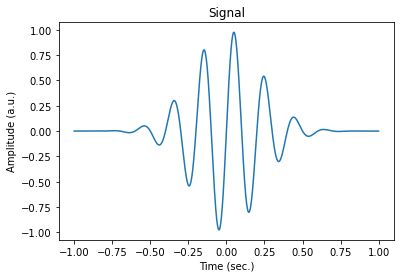

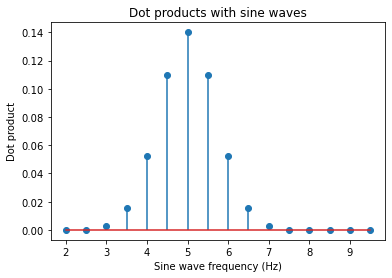

In [12]:
# with a signal

# phase of signal
theta = 0*np.pi/4;

# simulation parameters
srate = 1000;
time  = np.arange(-1.,1.,1./srate)

# signal
sinew  = np.sin( 2*np.pi * 5 * time + theta )
gauss  = np.exp( (-time**2) / .1 );
signal = np.multiply(sinew,gauss)

# sine wave frequencies
sinefrex = np.arange(2.,10.,.5);

# plot signal
plt.plot(time,signal)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()

# initialize dot products vector — dps: dot prodcut sine  
dps = np.zeros(len(sinefrex));

# loop over sine waves
for fi in range(1,len(dps)):
    
    # create sine wave
    sinew = np.sin( 2*np.pi*sinefrex[fi]*time )
    
    # compute dot product
    dps[fi] = np.dot( sinew,signal ) / len(time)
    
# and plot
plt.stem(sinefrex,dps)
plt.xlabel('Sine wave frequency (Hz)'), plt.ylabel('Dot product')
plt.title('Dot products with sine waves')
plt.show()

# Complex dot product

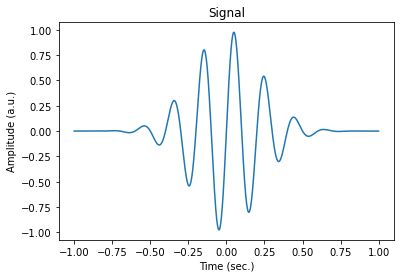

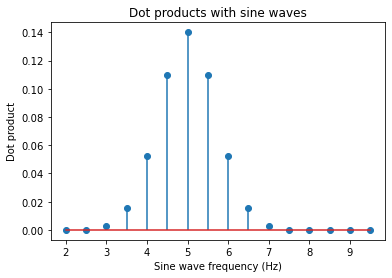

In [13]:
# phase of signal
theta = 0*np.pi/4;

# simulation parameters
srate = 1000;
time  = np.arange(-1.,1.,1./srate)

# signal
sinew  = np.sin( 2*np.pi * 5 * time + theta )
gauss  = np.exp( (-time**2) / .1 );
signal = np.multiply(sinew,gauss)

# sine wave frequencies
sinefrex = np.arange(2.,10.,.5);

# plot signal
plt.plot(time,signal)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()



# initialize dot products vector
dps = np.zeros(len(sinefrex));

# loop over sine waves
for fi in range(1,len(dps)):
    
    # create sine wave
    csinew = np.exp( 1j * 2*np.pi * sinefrex[fi] * time )
    
    # compute dot product
    dps[fi] = np.abs( np.dot( csinew,signal ) / len(time) )

    
# and plot
plt.stem(sinefrex,dps)
plt.xlabel('Sine wave frequency (Hz)'), plt.ylabel('Dot product')
plt.title('Dot products with sine waves')
plt.show()

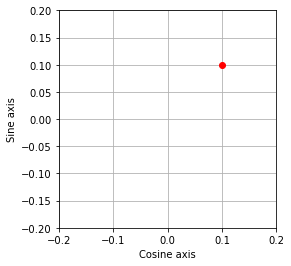

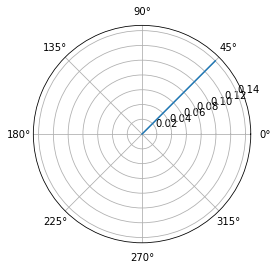

In [14]:
# in more detail...

# phase of signal
theta = 1*np.pi/4;

# signal
sinew  = np.sin(2*np.pi*5*time + theta)
gauss  = np.exp( (-time**2) / .1)
signal = np.multiply(sinew,gauss)

# create sine and cosine waves
sinew = np.sin( 2*np.pi*5*time )
cosnw = np.cos( 2*np.pi*5*time )

# compute dot products
dps = np.dot( sinew,signal ) / len(time)
dpc = np.dot( cosnw,signal ) / len(time)

# combine sine and cosine into complex dot product
dp_complex = complex(dpc,dps) # cos/sin were swapped in the video
mag = np.abs(dp_complex)
phs = np.angle(dp_complex)

# and plot
plt.plot( dpc , dps ,'ro')
plt.xlabel('Cosine axis')
plt.ylabel('Sine axis')
plt.axis('square')
plt.grid(True)
plt.axis([-.2,.2,-.2,.2])
plt.show()

# draw a line using polar notation
plt.polar([phs,phs],[0,mag])
plt.show()

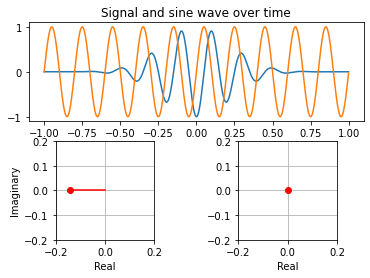

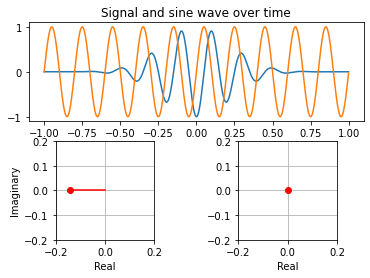

In [15]:
## illustration of the effect of phase offsets on dot products

# create complex sine wave
csw = np.exp( 1j*2*np.pi*5*time )
rsw = np.sin(    2*np.pi*5*time )

# specify range of phase offsets for signal
phases = np.linspace(0,7*np.pi/2,num=100)


for phi in range(0,len(phases)):
    
    # create signal
    sinew  = np.sin(2*np.pi*5*time + phases[phi])
    gauss  = np.exp( (-time**2) / .1)
    signal = np.multiply(sinew,gauss)

    # compute complex dot product
    cdp = np.sum( np.multiply(signal,csw) ) / len(time)

    # compute real-valued dot product
    rdp = sum( np.multiply(signal,rsw) ) / len(time)

    # plot signal and real part of sine wave
    pl.cla() # wipe the figure
    plt.subplot2grid((2,2), (0, 0), colspan=2)
    plt.plot(time,signal)
    plt.plot(time,rsw)
    plt.title('Signal and sine wave over time')

    # plot complex dot product
    plt.subplot2grid((2,2), (1, 0))
    plt.plot(np.real(cdp),np.imag(cdp),'ro')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.axis('square')
    plt.grid(True)
    plt.axis([-.2,.2,-.2,.2])
    plt.plot([0,np.real(cdp)],[0,np.imag(cdp)],'r')


    # draw normal dot product
    plt.subplot2grid((2,2), (1, 1))
    plt.plot(rdp,0,'ro')
    plt.xlabel('Real')
    plt.axis('square')
    plt.grid(True)
    plt.axis([-.2,.2,-.2,.2])


    # show plot    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    ttime.sleep(.01)


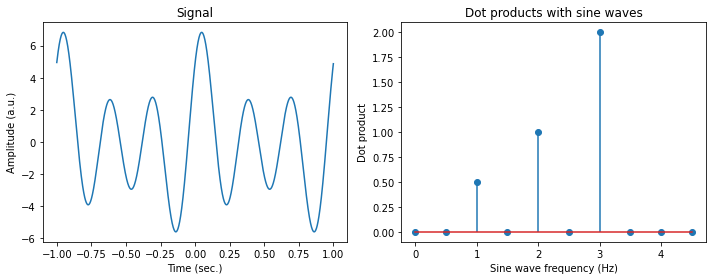

In [16]:
# in more detail...

# phase of signal
theta = 1*np.pi/4;

# signal
signal = np.zeros(len(time))
signal += 1 * np.sin( 2*np.pi * 1 * time + theta)
signal += 2 * np.sin( 2*np.pi * 2 * time + theta)
signal += 4 * np.sin( 2*np.pi * 3 * time + theta)

# create sine and cosine waves
sinew = np.sin( 2*np.pi*5*time )
cosnw = np.cos( 2*np.pi*5*time )

# sine wave frequencies
sinefrex = np.arange(0.,5.,.5);

# initialize dot products vector
dps = np.zeros(len(sinefrex));

# loop over sine waves
for fi in range(1,len(dps)):
    
    # create sine wave
    csinew = np.exp( 1j * 2*np.pi * sinefrex[fi] * time )
    
    # compute dot product
    dps[fi] = np.abs( np.dot( csinew,signal ) / len(time) )

    
# and plot
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].plot( time, signal )
ax[0].set_xlabel('Time (sec.)'), ax[0].set_ylabel('Amplitude (a.u.)')
ax[0].set_title('Signal')
ax[1].stem( sinefrex, dps )
ax[1].set_xlabel('Sine wave frequency (Hz)'), ax[1].set_ylabel('Dot product')
ax[1].set_title('Dot products with sine waves')
plt.tight_layout()
plt.show()